# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


In [2]:
results['actual'].to_list()

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0

## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

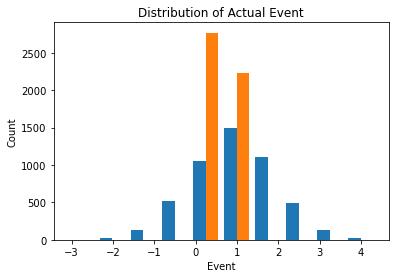

In [3]:
# insert code here
results['actual']= np.random.normal(loc=1, scale=1, size=5000)

# histogram plot
plt.hist(results, bins=10)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Distribution of Actual Event')
plt.show()


Insert comments here

looks like distribution of Actual event is biased.If the distribution of the actual events is imbalanced, it can lead to bias in the model's predictions and can't handle imbalanced data.



## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

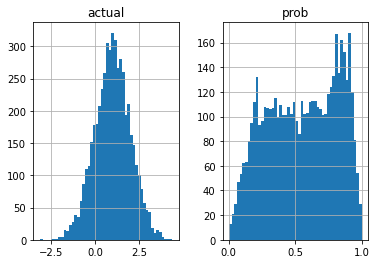

In [4]:
# insert code here
import matplotlib.pyplot as plt
%matplotlib inline

results.hist(bins=50)
plt.show()

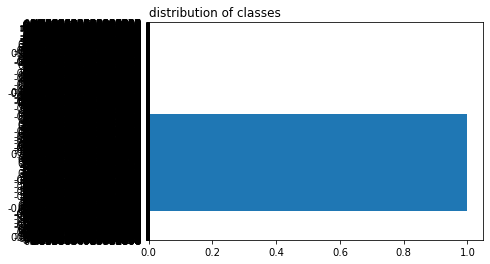

In [5]:
results['actual'].value_counts().plot.barh()
plt.title('distribution of classes', loc='left')
plt.show()

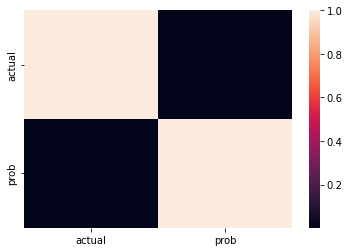

In [6]:
import seaborn as sns

sns.heatmap(results.corr())
plt.show()

Insert comments here

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [7]:
from sklearn.model_selection import train_test_split
X = results.drop('actual', axis=1)
some_y = np.where(results['actual'] > 0.5, 1, 0)
y= pd.DataFrame(some_y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=124)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 4,000
Test samples: 1,000


In [8]:
y_train

,0
4717,1
2296,1
2134,1
2428,1
1205,0
...,...
681,0
962,0
135,0
4764,1


In [9]:
X_train

,prob
4717,0.618582
2296,0.403046
2134,0.854165
2428,0.437295
1205,0.640140
...,...
681,0.729070
962,0.574663
135,0.801983
4764,0.207998


In [15]:
sum(some_y)/len(some_y)

0.6908

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_binary = np.zeros_like(y_pred)
y_pred_binary[y_pred >= 0.5] = 1

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

print(f'True Negatives: {tn}')
print(f'False Positives: {fp}')
print(f'False Negatives: {fn}')
print(f'True Positives: {tp}')


True Negatives: 0
False Positives: 315
False Negatives: 0
True Positives: 685


Insert Comments here:
    
   The above model looks biased towards predicting positive cases and is likely to have a high false positive rate. It is also possible that the dataset is imbalanced, with a large number of positive cases and a small number of negative cases, which can also lead to high false positive rates.

In order to properly evaluate the performance of the model and determine its usefulness for the intended task, additional metrics such as precision, recall, and F1 score should be calculated. It would also be important to analyze the dataset and the model's predictions to identify any potential issues and improve its performance if necessary.

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [26]:
lr_score=model.score(X_test,y_test)
lr_score

-0.000860971712039138

If the score of a linear regression model is negative, it suggests that the model is not a good fit for the data and is performing worse than a model that simply predicts the mean of the target variable.

A negative score for a linear regression model indicates that the sum of squared errors (SSE) of the model is greater than the total sum of squares (TSS) of the target variable, which means that the model is not able to explain any of the variation in the target variable.

In such cases, it is important to re-evaluate the model and consider whether there are issues with the dataset or the model's features that are causing the poor performance. It may be necessary to collect more data, engineer new features, or try different modeling techniques to improve the model's performance. It is also possible that the problem is inherently difficult and a linear regression model may not be appropriate for the task at hand.

In [23]:
# insert code here
Accuracy = (tp + tn) / (tp + tn + fp + fn) 
Accuracy


0.685

In [24]:
Precision = tp / (tp + fp)
Precision

0.685

In [25]:
Recall = tp / (tp + fn) 
Recall

1.0

Insert comments here

If I had to use only one measure among accuracy=0.685, precision=0.685, and recall=1 for my model, I would use recall.

The reason for this is that recall=1 which represents the percentage of actual positive cases that were correctly identified by the model.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

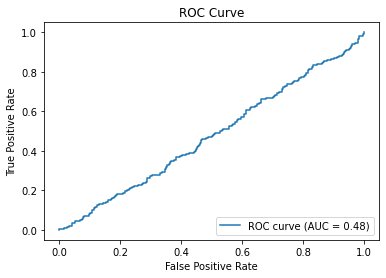

In [30]:
# Insert code here

from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for the test data using the trained linear regression model
y_pred = model.predict(X_test)
y_prob = 1 / (1 + np.exp(-y_pred))  # Applied logistic transformation

# Calculated the false positive rate (FPR) and true positive rate (TPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculated the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Insert comments here

The AUC of a ROC curve is 0.48, it indicates that the performance of the binary classifier is poor.
AUC values between 0.5 and 1 indicate varying degrees of classifier performance, with higher AUC values indicating better performance.